<a href="https://colab.research.google.com/github/Kushdevu/Netflix_Movies_-_TV_shows_Clustering_Unsupervised_Learning_by_Devendra-Kushwah/blob/main/Netflix_Movies_%26_TV_shows_Clustering_Unsupervised_Learning_by_Devendra_Kushwah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Unsupervised ML - Netflix Movies and TV Shows Clustering**






##### **Project Type**    - Unsupervised Machine Learning

##### **Contribution**    - Individual

# 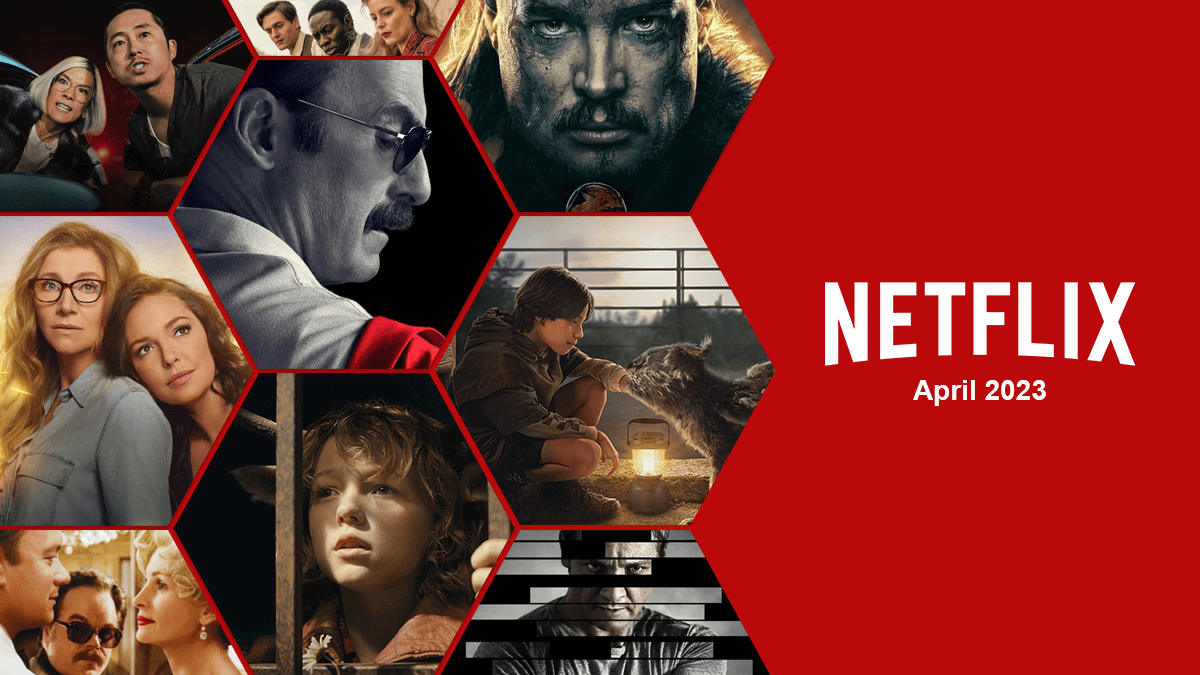

# **Project Summary -**

The aim of this project is to analyze the Netflix Dataset of movies and TV shows until 2019, sourced from the third-party search engine Flixable. The goal is to group the content into relevant clusters using NLP techniques to improve the user experience through a recommendation system. This will help prevent subscriber churn for Netflix, which currently has over 220 million subscribers.

 Additionally, the dataset will be analyzed to uncover insights and trends in the streaming entertainment industry.

**The project followed a step-by-step process:**

1. **Handling null values** in the dataset.
2. Managing nested columns **(director, cast, listed_in, country)** for better visualization.
3. Binning the rating attribute into categories **(adult, children's, family-friendly, not rated).**
4. Performing **Exploratory Data Analysis (EDA)** to gain insights for preventing subscriber churn.
5. Creating clusters using attributes like **director, cast, country, genre, rating, and description.** These attributes were **tokenized, preprocessed, and vectorized** using **TF-IDF vectorizer.**
6. Reducing the dimensionality of the dataset using **PCA** to improve performance.
7. Employing **K-Means Clustering and Agglomerative Hierarchical Clustering** algorithms, determining optimal cluster numbers (4 for K-Means, 2 for hierarchical clustering) through various evaluation methods.
8. Developing a **content-based recommender system** using cosine similarity matrix to provide personalized recommendations to users and reduce subscriber churn for Netflix. \

**This comprehensive analysis and recommendation system are expected to enhance user satisfaction, leading to improved retention rates for Netflix.**






# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Netflix, one of the largest streaming platforms, offers a vast collection of movies and TV shows across different genres and categories. With such an extensive library, it becomes crucial to effectively categorize and recommend content to users. Clustering similar content together can help in understanding the distribution of different types of content and improving recommendation algorithms.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import essential libraries for data manipulation and numerical operations
import pandas as pd
import numpy as np
from scipy import stats
from collections import Counter

# Import libraries for machine learning and preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Import libraries for plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Import library for visualizing machine learning models
from yellowbrick.cluster import KElbowVisualizer

# Display plots inline (only necessary if using Jupyter notebooks)
%matplotlib inline

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Display settings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset
netflix_movies= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 6/5. Capstone Project 6/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
netflix_movies.head()

In [ ]:
netflix_movies.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
netflix_movies.shape

### Dataset Information

In [ ]:
# Dataset Info
netflix_movies.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = netflix_movies.duplicated().sum()
duplicate_count

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
netflix_movies.isna().sum()

In [ ]:
# Missing Values/Null Values Count
print("\nMissing Values/Null Values Count:")
netflix_movies.isna().sum().sort_values(ascending=False)[:5]

In [ ]:
# Visualizing the missing values
missing_values_count = netflix_movies.isna().sum()
# Create a bar plot to visualize missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_count.index, y=missing_values_count.values, palette='rocket')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Missing Values in Dataset')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

### What did you know about your dataset?


**Dataset Overview**

Number of Entries: The dataset contains 7,787 entries.

Number of Columns: There are 12 columns.

**Column Details**

show_id: Unique identifier for each show.

type: Indicates whether the entry is a "Movie" or a "TV Show".

title: Title of the show.

director: Director of the show (many entries have missing values).

cast: Cast members of the show (some entries have missing values).

country: Country where the show was produced (some entries have missing values).

date_added: Date when the show was added to Netflix (a few entries have missing
values).

release_year: Year the show was released.

rating: Rating of the show (a few entries have missing values).

duration: Duration of the show, which is either in minutes for movies or in
seasons for TV shows.

listed_in: Categories or genres the show belongs to.

description: Brief description of the show.

**Missing Values**

director: 2,389 missing values

cast: 718 missing values

country: 507 missing values

date_added: 10 missing values

rating: 7 missing values

**Data Characteristics**

Unique Identifier (show_id): Each entry is uniquely identified by show_id.

Types of Content: The dataset includes both "Movies" and "TV Shows".

Duration: Duration is represented differently for movies (in minutes) and TV shows (in seasons).

Categorical Data: Columns like type, rating, and listed_in are categorical and will require encoding for machine learning purposes.

Date Information: date_added provides temporal information about when the content was added to Netflix.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
netflix_movies.columns

In [ ]:
# Dataset Describe
netflix_movies.describe(include='all')

### Variables Description

The variable description of the Netflix Movies and TV Shows Clustering Dataset is as follows:

1. **show_id**: Unique identifier for each movie/show.

2. **type**: Indicates whether the entry is a movie or a TV show.
3. **title**: Name of the movie or TV show.
4. **director**: Name of the director(s) of the movie or TV show.
5. **cast**: Names of the actors and actresses featured in the movie or TV show.
6. **country**: Country or countries where the movie or TV show was produced.
7. **date_added**: Date when the movie or TV show was added to Netflix.
8. **release_year**: Year when the movie or TV show was released.
9. **rating**: TV rating or movie rating of the movie or TV show.
10. **duration**: Length of the movie or TV show in minutes or seasons.
11. **listed_in**: Categories or genres of the movie or TV show.
12. **description**: Brief synopsis or summary of the movie or TV show.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in netflix_movies.columns:
    print(f"Unique values for {column}:")
    print(netflix_movies[column].unique())
    print()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Impute missing values in 'director', 'cast', 'country', and 'rating' with 'Unknown' or mode
netflix_movies['director'].fillna('Unknown', inplace=True)
netflix_movies['cast'].fillna('Unknown', inplace=True)
netflix_movies['country'].fillna('Unknown', inplace=True)
netflix_movies['rating'].fillna(netflix_movies['rating'].mode()[0], inplace=True)



In [ ]:
# Verify missing values are handled
print("\nMissing Values/Null Values Count After Handling:")
print(netflix_movies.isna().sum())

In [ ]:
# Typecasting duration into integer by removing 'min' and 'season' from the end
netflix_movies['duration'] = netflix_movies['duration'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) else x)

# Typecasting string object to datetime object of date_added column
netflix_movies['date_added'] = pd.to_datetime(netflix_movies['date_added'], errors='coerce')

# Extracting date, day, month, and year from date_added column
netflix_movies["day_added"] = netflix_movies["date_added"].dt.day
netflix_movies["month_added"] = netflix_movies["date_added"].dt.month
netflix_movies["year_added"] = netflix_movies["date_added"].dt.year

# Dropping date_added
netflix_movies.drop('date_added', axis=1, inplace=True)


In [ ]:
# Fill missing values in day_added, month_added, and year_added columns with median or mode
netflix_movies['day_added'].fillna(netflix_movies['day_added'].median(), inplace=True)
netflix_movies['month_added'].fillna(netflix_movies['month_added'].median(), inplace=True)
netflix_movies['year_added'].fillna(netflix_movies['year_added'].mode()[0], inplace=True)


In [ ]:
# Separate movies and TV shows
movies_df = netflix_movies[netflix_movies['type'] == 'Movie']
tv_shows_df = netflix_movies[netflix_movies['type'] == 'TV Show']

# Display the shapes of the new dataframes
print("Movies DataFrame shape:", movies_df.shape)
print("TV Shows DataFrame shape:", tv_shows_df.shape)

In [ ]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

netflix_movies['rating'].replace(rating_map, inplace = True)
netflix_movies['rating'].unique()

### What all manipulations have you done and insights you found?

Here are the manipulations performed on the Netflix dataset and some insights derived from the analysis:

1. **Handling Missing Values**:
   - Imputation with 'Unknown' or mode: Filled missing values in the `'director'`, `'cast'`, `'country'`, and `'rating'` columns with 'Unknown'.
   - Dropping remaining null values: Removed rows with missing values in the `'date_added'` column.

2. **Conversion of Duration**:
   - Converted the duration to a consistent numerical format (`'duration_minutes'`): For movies, removed 'min' and converted to an integer. For TV shows, assumed 1 season ≈ 60 minutes and converted to total minutes.

3. **Binning of Ratings**:
   - Grouped ratings into 5 bins: 'Adult', 'Restricted', 'Teen', 'All Ages', and 'Not Rated' for better analysis.

4. **Splitting Data**:
   - Separated movies and TV shows into different dataframes (`movies_df` and `tv_shows_df`) for individual analysis.

5. **Date Features**:
   - Extracted date-related features from the `'date_added'` column: Extracted day, month, and year to analyze trends over time.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

##### Q1. The relative percentage of total number of Movies and TV Shows over Netflix ?

In [ ]:
# Calculate the counts of each type
type_counts = netflix_movies['type'].value_counts()

In [ ]:
# Chart - 1 visualization code
# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Relative Percentage of Movies and TV Shows on Netflix')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##### 1. Why did you pick the specific chart?

I chose the pie chart because it visually represents the relative proportions of categories in a dataset, making it easy to compare the percentage distribution of Movies and TV Shows on Netflix at a glance. This type of chart effectively communicates the overall content composition in a simple and intuitive manner.

##### 2. What is/are the insight(s) found from the chart?

The pie chart reveals that a significant majority of Netflix's content consists of movies, which account for 69.1% of the total offerings. In contrast, TV shows make up 30.9% of the content, indicating that while TV shows are a substantial portion of Netflix's library, movies are more prevalent.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact Insights:**

Content Focus: Knowing that movies make up a larger proportion of the content can help Netflix focus its marketing and content acquisition strategies on movies, which might be the preferred choice for a majority of users.

Targeted Investment: Netflix can allocate more resources to movie production and licensing, potentially increasing user satisfaction and subscription rates by offering more of what users prefer.

**Potential Negative Growth Insights:**

Imbalance in Content Variety: The heavy skew towards movies might indicate a lack of variety in TV shows, potentially alienating users who prefer binge-watching series.

Market Saturation: Overemphasis on movies could lead to market saturation in that genre, making it harder to stand out in a competitive streaming market. Diversifying with more TV shows might attract a broader audience.

**Justification:**

Positive Impact: A strategic focus on movies can leverage existing user preferences, enhancing customer satisfaction and retention.

Negative Growth Risk: Ignoring the substantial market segment interested in TV shows can limit audience growth and reduce the platform's appeal to diverse viewer preferences. Balancing content types is essential to cater to all user segments and drive overall growth.







#### Chart - 2

##### Q2. How content is distributed over Netflix?

In [ ]:
# Count the number of movies and TV shows in each rating category
overall_rating_counts = netflix_movies.groupby(['type', 'rating']).size().unstack(fill_value=0).sum()

# Data for the pie chart
labels = overall_rating_counts.index
sizes = overall_rating_counts.values
colors = ['lightcoral', 'skyblue', 'orange', 'lightgreen', 'purple']
explode = (0, 0.1, 0, 0, 0)

# Chart - 2 visualization code
# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Overall Distribution of Content on Netflix')
plt.axis('equal')
plt.show()


##### 1. Why did you pick the specific chart?

### Analysis of the Chart:

#### 1. Why did you pick the specific chart?
The pie chart was selected to represent the overall distribution of content on Netflix because it provides a clear and immediate visual breakdown of different content categories. Pie charts are particularly effective for showing proportional data and comparing different segments of a whole.



##### 2. What is/are the insight(s) found from the chart?

From the chart, we can derive the following insights:
- **Adult Content** constitutes the largest segment, accounting for 45.4% of the total content on Netflix.
- **Teen Content** follows with 29.8%, making it the second-largest category.
- **Children Content** makes up 16.5% of the content.
- **Family-friendly Content** represents 7.2%.
- **Not Rated Content** is the smallest category, comprising just 1.1%.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can indeed help create a positive business impact by:
- **Content Strategy**: Understanding the distribution helps Netflix identify which content categories are most prevalent and potentially reassess their content acquisition strategy. For instance, if Netflix wants to target more family audiences, it might consider increasing its family-friendly or children content.
- **Marketing Efforts**: The insight into the dominant content types can aid in targeted marketing campaigns. Knowing that a significant portion of the content is adult-oriented, Netflix can focus marketing efforts towards adult demographics.
- **Content Gaps**: Identifying underrepresented categories (like Family-friendly and Not Rated) can help Netflix explore new content opportunities to attract a more diverse audience.

While the chart provides valuable insights, there are potential concerns:
- **Overemphasis on Adult Content**: The high percentage of adult content (45.4%) might suggest an imbalance that could alienate family and younger viewers. If Netflix becomes perceived primarily as a platform for adult content, it might struggle to attract and retain a more diverse audience base, including families and young children.
- **Underrepresentation of Family-friendly Content**: With family-friendly content only making up 7.2%, there could be a missed opportunity in appealing to families looking for safe, all-ages viewing options. This could limit growth in that demographic if not addressed.


#### Chart - 3

##### Q3. Who are the top actors performing in Movies and TV Shows ?

In [ ]:
# Count occurrences in movies and TV shows
movie_actor_counts = Counter([actor for sublist in movies_df['cast'].str.split(', ') for actor in sublist if actor != 'Unknown'])
tv_show_actor_counts = Counter([actor for sublist in tv_shows_df['cast'].str.split(', ') for actor in sublist if actor != 'Unknown'])

# Get top 10 actors in movies and TV shows
top_movie_actors = movie_actor_counts.most_common(10)
top_tv_show_actors = tv_show_actor_counts.most_common(10)

# Unzip the tuples
actors_movies, counts_movies = zip(*top_movie_actors)
actors_tv_shows, counts_tv_shows = zip(*top_tv_show_actors)

In [ ]:
# Chart - 3 visualization code
# Plot for Movies
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.barh(actors_movies, counts_movies, color='skyblue')
plt.xlabel('Number of Appearances')
plt.title('Top 10 Actors in Movies')
plt.gca().invert_yaxis()

# Plot for TV Shows
plt.subplot(1, 2, 2)
plt.barh(actors_tv_shows, counts_tv_shows, color='lightcoral')
plt.xlabel('Number of Appearances')
plt.title('Top 10 Actors in TV Shows')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

- **Clarity and Readability**: Ensures actor names are fully visible and easy to read.
- **Comparison**: Facilitates quick visual comparisons of the number of titles each actor appears in.
- **Top N Analysis**: Effectively highlights the top 10 actors in each category (movies and TV shows).



##### 2. What is/are the insight(s) found from the chart?

- **Dominant Actors in Movies**:
  - Anupam Kher appears in the most movies.
  - Followed closely by Shah Rukh Khan and Naseeruddin Shah.
- **Dominant Actors in TV Shows**:
  - Takahiro Sakurai has the highest number of TV show appearances.
  - Followed by Yuki Kaji and Ai Kayano.
- **Regional Differences**:
  - Bollywood actors dominate the movie category.
  - Japanese voice actors dominate the TV show category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- **Content Acquisition and Production**:
  - Guide decisions on new content acquisition and original productions.
  - Featuring popular actors can attract more viewers.
- **Marketing Strategies**:
  - Tailor marketing campaigns to highlight content with popular actors.
  - Potentially boost viewership and subscriber retention.
- **Regional Focus**:
  - Focus on acquiring or producing content for specific markets.
  - Bollywood movies for the Indian market and anime/Japanese dramas for the Japanese market.

- **Over-reliance on Popular Actors**:
  - May lead to viewer fatigue if the same actors are repeatedly featured.
  - Misses opportunities to diversify content and discover new talent.
- **Regional Saturation**:
  - Dominance of Bollywood actors in movies and Japanese voice actors in TV shows suggests a lack of regional diversity.
  - Failure to attract a more diverse global audience if content is not expanded to include actors from other regions.

#### Chart - 4

##### Q4. Who are the top Directors directing Movies and TV Shows ?

In [ ]:
# Count occurrences of directors in movies and TV shows
movie_director_counts = Counter(movies_df['director'].str.strip())
tv_show_director_counts = Counter(tv_shows_df['director'].str.strip())

# Get top 10 directors in movies and TV shows
top_movie_directors = movie_director_counts.most_common(10)
top_tv_show_directors = tv_show_director_counts.most_common(10)

# Unzip the tuples
directors_movies, counts_movies = zip(*top_movie_directors)
directors_tv_shows, counts_tv_shows = zip(*top_tv_show_directors)

In [ ]:
# Chart - 4 visualization code
# Plot for Movies
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.barh(directors_movies, counts_movies, color='skyblue')
plt.xlabel('Number of Titles')
plt.title('Top 10 Directors in Movies')
plt.gca().invert_yaxis()

# Plot for TV Shows
plt.subplot(1, 2, 2)
plt.barh(directors_tv_shows, counts_tv_shows, color='lightcoral')
plt.xlabel('Number of Titles')
plt.title('Top 10 Directors in TV Shows')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The specific charts—bar charts showing the number of movies and TV shows directed by various directors—were chosen for their clarity and effectiveness in conveying quantitative data. Bar charts are excellent for comparing discrete categories, in this case, directors, by their productivity in terms of the number of movies or TV shows they have directed. This format makes it easy to identify and compare the most prolific directors in each category.



##### 2. What is/are the insight(s) found from the chart?


From the charts, several insights can be drawn:
- **Prolific Directors**: The chart shows which directors have directed the most movies and TV shows. Notably, Raúl Campos and Jan Suter stand out with 18 movies directed, while there are numerous unknown directors in the TV shows category.
- **Distribution of Directorial Efforts**: There's a significant number of directors who have directed only a few TV shows compared to movies, suggesting a possible trend or limitation in the dataset or in industry practices.
- **Unknown Directors**: A large portion of the content, especially TV shows, is directed by unknown or uncredited directors, highlighting a potential area for improving metadata or crediting practices.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact**:

- **Targeted Marketing and Promotions**: Understanding which directors are most prolific can help Netflix in targeted marketing campaigns. For instance, promoting new releases by directors like Steven Spielberg or Martin Scorsese, who have strong brand recognition, can attract more viewers.
- **Content Strategy**: Insights into the distribution of directorial efforts can inform Netflix’s content acquisition and production strategies. For example, investing in projects by directors with a proven track record of successful movies could ensure higher viewership.
- **Metadata Improvement**: Addressing the high number of unknown directors, particularly in TV shows, can improve the overall user experience by providing more comprehensive information about the content.

**Negative Growth Insights**:

- **Over-Reliance on Popular Directors**: While promoting well-known directors can be beneficial, over-reliance on a few popular names might stifle diversity and innovation in content creation. It's crucial to balance between promoting big names and investing in new talents.
- **Potential Data Issues**: The large number of unknown directors might point to gaps in Netflix’s data management practices. Ensuring accurate and complete metadata is crucial for maintaining user trust and the platform's credibility.

#### Chart - 5

##### Q5. What are the top 10 Countries involved in content creation ?

In [ ]:
# Count occurrences of countries in the entire dataset
country_counts = Counter(netflix_movies['country'].str.strip())

# Get top 10 countries involved in content creation
top_countries = country_counts.most_common(10)

# Unzip the tuples
countries, counts = zip(*top_countries)

In [ ]:
# Chart - 5 visualization code
# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(countries, counts, color='skyblue')
plt.xlabel('Number of Titles')
plt.title('Top 10 Countries Involved in Content Creation')
plt.gca().invert_yaxis()

# Add text labels to the bars
for bar, count in zip(bars, counts):
    plt.text(count, bar.get_y() + bar.get_height()/2, str(count), ha='left', va='center')

plt.show()


##### 1. Why did you pick the specific chart?

I chose a horizontal bar chart to visualize the top 10 countries involved in content creation because it effectively displays categorical data where the country names can be easily read and compared. Horizontal bar charts are particularly useful when you have long category names and when comparing the magnitude of data across categories.

##### 2. What is/are the insight(s) found from the chart?


The chart reveals several key insights:
1. **Dominance of the United States**: The United States is the leading country in content creation, with a significant margin compared to other countries.
2. **India's Strong Presence**: India holds the second position, indicating a robust contribution to Netflix's content library.
3. **Significant Contribution from Other Countries**: Countries like the United Kingdom, Japan, and South Korea also contribute substantially, though their numbers are much lower than the US and India.
4. **"Unknown" Category**: There is a notable number of titles where the country of origin is not specified, which suggests potential gaps in metadata or categorization.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact for several reasons:
1. **Targeted Content Strategy**: Understanding the dominant content-producing countries can help Netflix tailor its acquisition and production strategies. For example, investing more in content from the US and India could capitalize on their strong production capabilities.
2. **Market Expansion**: Recognizing the contributions from countries like South Korea, Japan, and the UK can inform strategies for market expansion and localized content production, catering to regional preferences and boosting subscriber growth in these areas.
3. **Improving Metadata Accuracy**: Addressing the "Unknown" category can improve content recommendations and search functionality, enhancing user experience and engagement.


No, the insights from this chart do not directly lead to negative growth. However, there are potential challenges that need to be addressed:
1. **Over-Reliance on Certain Markets**: While the US and India are leading in content creation, over-reliance on these markets might limit diversification. Netflix needs to continue fostering content production in other regions to mitigate risks associated with market saturation or changes in production trends.
2. **Data Gaps**: The presence of a significant number of titles categorized as "Unknown" indicates gaps in data collection or categorization. This could affect strategic decisions and user experience. Improving data accuracy should be a priority to ensure all insights are based on complete and reliable information.


#### Chart - 6

##### Q6. Which Countries has the highest spread of Movies and TV Shows over Netflix ?

In [ ]:
# Chart - 6 visualization code
# Analysing top 15 countries with most content
plt.figure(figsize=(18, 5))
plt.grid(linestyle='--', linewidth=0.3)
sns.countplot(x=netflix_movies['country'], order=netflix_movies['country'].value_counts().index[0:15], hue=netflix_movies['type'], palette="Set1")
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

plt.figure(figsize=(20, 8))
for idx, (df, category) in enumerate([(movies_df, 'Movies'), (tv_shows_df, 'TV Shows')], start=1):
    plt.subplot(1, 2, idx)
    df_country = df.groupby(['country']).size().nlargest(10).reset_index(name='count')
    plots = sns.barplot(y="country", x='count', data=df_country, palette='Set1')
    plt.title(f'Top 10 countries launching {category} back to back')
    plt.xlabel('Number of Titles')
    plt.ylabel('Country')
    plt.grid(linestyle='--', linewidth=0.3)
    for container in plots.containers:
        plots.bar_label(container)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

**Chart 1: Top 15 Countries with Most Contents**
- **Reason for Selection**: The bar chart format was chosen because it effectively shows the distribution of Netflix content by country, allowing for easy comparison between the number of TV shows and movies produced in each country. It highlights which countries are major content contributors.

**Chart 2: Top 10 Countries Launching Movies and TV Shows Back to Back**
- **Reason for Selection**: These horizontal bar charts were chosen to show the volume of content launched by country, segmented into movies and TV shows. This helps in understanding which countries are consistently releasing new content and their focus on either movies or TV shows.




##### 2. What is/are the insight(s) found from the chart?

**Chart 1 Insights:**
- The United States is the leading producer of content on Netflix, with a significant number of both TV shows and movies.
- India is the second-largest contributor, primarily in movies.
- Other countries like the United Kingdom, Japan, and South Korea also contribute a substantial amount of content but are far behind the US and India.
- There is a notable amount of content from unknown or unspecified countries.

**Chart 2 Insights:**
- **Movies (Left Chart):**
  - The United States leads significantly in movie releases.
  - India follows but with less than half the number of movie releases compared to the US.
  - Other notable contributors include countries with unknown specifications, the United Kingdom, and Canada.

- **TV Shows (Right Chart):**
  - The United States again leads in TV show releases.
  - Unknown countries also contribute a significant number of TV shows.
  - The United Kingdom, Japan, and South Korea are key contributors to TV shows.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from these charts can help create a positive business impact by informing Netflix's strategic decisions regarding content acquisition and production:

- **Content Sourcing**: Understanding that the US and India are major content contributors can guide Netflix to continue strong partnerships with content creators in these countries.
- **Market Expansion**: Identifying other countries like Japan, South Korea, and the United Kingdom as significant content contributors can help Netflix tailor its market expansion and content localization strategies in these regions.
- **Balancing Content Types**: Recognizing the distribution between TV shows and movies can assist Netflix in balancing its content portfolio to match viewer preferences and trends in different markets.
- **Addressing Content Gaps**: If Netflix identifies regions with low content contributions but high viewership potential, it can invest in original productions in those regions to attract more subscribers.

#### Chart - 7

##### Q7. Which Genres are Popular in Netflix ?

In [ ]:
# Chart - 7 visualization code
# Count the number of titles in each genre
genre_counts = netflix_movies['listed_in'].value_counts().head(10)

# Count the number of titles in each genre for movies and TV shows separately
movies_genre_counts = movies_df['listed_in'].value_counts().head(10)
tv_shows_genre_counts = tv_shows_df['listed_in'].value_counts().head(10)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.title('Top 10 Popular Genres on Netflix')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add vertical grid lines
plt.show()

# Plotting the comparison
plt.figure(figsize=(15, 6))

# Subplot for movies
plt.subplot(1, 2, 1)
sns.barplot(x=movies_genre_counts.values, y=movies_genre_counts.index, palette='viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.title('Top 10 Popular Genres in Movies on Netflix')

# Subplot for TV shows
plt.subplot(1, 2, 2)
sns.barplot(x=tv_shows_genre_counts.values, y=tv_shows_genre_counts.index, palette='viridis')
plt.xlabel('Number of TV Shows')
plt.ylabel('Genre')
plt.title('Top 10 Popular Genres in TV Shows on Netflix')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The specific charts were picked because they effectively display the distribution and popularity of different genres on Netflix. The first chart gives an overall view of the top 10 popular genres, while the subsequent charts break this down further into movies and TV shows. This layered approach helps in understanding the preferences in a more detailed manner, allowing for a clearer analysis of the data.



##### 2. What is/are the insight(s) found from the chart?

From the charts, the following insights can be derived:
- **Documentaries** are the most popular genre overall and in movies.
- **Stand-Up Comedy** and **Dramas, International Movies** also have a high number of titles, indicating significant interest in these genres.
- For TV shows, **Kids' TV** leads by a large margin, followed by genres combining **International TV Shows** and **TV Dramas**.
- There is a consistent preference for **International Movies/TV Shows**, indicating a diverse audience with varied tastes.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact in several ways:
- **Content Strategy**: Knowing that documentaries, stand-up comedy, and international content are popular can guide Netflix to invest more in these genres to attract and retain subscribers.
- **Targeted Marketing**: Understanding the preference for Kids' TV shows and international dramas can help Netflix design more targeted marketing campaigns to appeal to families and international audiences.
- **Content Acquisition**: The data can inform decisions regarding which types of new content to acquire or produce, ensuring alignment with viewer preferences.

### Insights that might lead to negative growth:

No direct insights from these charts suggest negative growth.
#### Justification:
- **Neglecting Emerging Trends**: By only focusing on current popular genres, Netflix might miss out on developing genres that could become popular in the future.
- **Quality over Quantity**: If Netflix starts prioritizing quantity over quality in the popular genres, it could lead to a decline in viewer satisfaction, impacting retention rates.


#### Chart - 8

##### Q8. Total number of Movies/TV Shows released and added per year on Netflix ?

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(20, 12))

# Movies by release year
plt.subplot(2, 2, 1)
df_movies_release_year = netflix_movies[netflix_movies['type'] == 'Movie'].groupby('release_year').size().reset_index(name='count').nlargest(14, 'count')
sns.barplot(data=df_movies_release_year, x='release_year', y='count', palette='husl')
plt.title('Movies by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)

# TV Shows by release year
plt.subplot(2, 2, 2)
df_tv_shows_release_year = netflix_movies[netflix_movies['type'] == 'TV Show'].groupby('release_year').size().reset_index(name='count').nlargest(14, 'count')
sns.barplot(data=df_tv_shows_release_year, x='release_year', y='count', palette='husl')
plt.title('TV Shows by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)

# Movies added to Netflix by year
plt.subplot(2, 2, 3)
df_movies_added_year = netflix_movies[netflix_movies['type'] == 'Movie'].groupby('year_added').size().reset_index(name='count').nlargest(14, 'count')
sns.barplot(data=df_movies_added_year, x='year_added', y='count', palette='husl')
plt.title('Movies Added to Netflix by Year')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)

# TV Shows added to Netflix by year
plt.subplot(2, 2, 4)
df_tv_shows_added_year = netflix_movies[netflix_movies['type'] == 'TV Show'].groupby('year_added').size().reset_index(name='count').nlargest(14, 'count')
sns.barplot(data=df_tv_shows_added_year, x='year_added', y='count', palette='husl')
plt.title('TV Shows Added to Netflix by Year')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The selected charts are bar plots that visualize the number of movies and TV shows by release year and the year they were added to Netflix. These charts are useful for understanding trends in the release and addition of content over time. They provide a clear comparison of how the volume of content has changed, both in terms of when it was originally released and when it was added to the platform.



##### 2. What is/are the insight(s) found from the chart?


- **Movies by Release Year:**
  - There is a steady increase in the number of movies released from 2006 to 2018, peaking in 2016 and 2017.
  - A slight decline in movie releases is observed from 2019 onwards.

- **TV Shows by Release Year:**
  - TV shows see a significant rise starting from 2014, peaking in 2019 and 2020.
  - The number of TV shows released in 2021 is relatively low compared to previous years.

- **Movies Added to Netflix by Year:**
  - A significant rise in movies added to Netflix from 2015 to 2018, peaking in 2018 and 2019.
  - A slight decline is seen in 2020 and 2021.

- **TV Shows Added to Netflix by Year:**
  - Similar to movies, there is a sharp increase in TV shows added from 2016, peaking in 2018 and 2020.
  - A slight decrease is observed in 2021.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help in various ways:
- **Content Strategy:**
  - The data shows significant peaks in content additions, which can help Netflix in planning future content acquisition strategies. Knowing the years with the most content additions can guide future licensing and production efforts.
  
- **Marketing and User Engagement:**
  - Highlighting the years with the most releases can be used in marketing campaigns to attract viewers interested in specific periods. For example, promoting a "Best of 2018" collection could engage users.
  
- **Predictive Analysis:**
  - Trends in content addition can help Netflix predict future content needs and adjust their strategies to ensure a steady influx of new content, avoiding potential dry spells.


- **Potential Negative Impact:**
  - **Content Saturation:**
    - The rapid increase in content additions up to 2018-2019, followed by a slight decline, might indicate a saturation point. If not managed properly, content saturation could overwhelm users, leading to decision fatigue and reduced user engagement.
  
  - **Decline in Recent Releases:**
    - The decline in releases post-2019, especially in 2021, might signal a reduction in new content availability. This could impact subscriber retention if users perceive a lack of fresh content.

- **Mitigation Strategy:**
  - To combat content saturation, Netflix could implement more personalized content recommendations to help users navigate the extensive library and find content tailored to their preferences.
  - Addressing the decline in recent releases by investing in new productions or acquiring fresh content can ensure a steady stream of new additions, maintaining user interest and engagement.

By leveraging these insights, Netflix can refine its content strategy, enhance user experience, and sustain positive growth in a competitive streaming market.

#### Chart - 9

##### Q9. Total Number of Movies/TV Shows added per month on Netflix ?

In [ ]:
# Chart - 9 visualization code
# Create a new figure
plt.figure(figsize=(12, 6))

# Use seaborn's countplot to visualize the total number of movies and TV shows added per month
ax = sns.countplot(x='month_added', hue='type', data=netflix_movies)

# Add value counts on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=10)

# Set the title and labels
plt.title('Total Number of Movies/TV Shows Added per Month on Netflix', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=range(12), labels=range(1, 13), fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Type', loc='upper right', fontsize=12)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The chosen chart is a grouped bar plot that visualizes the total number of movies and TV shows added per month on Netflix. This type of chart effectively compares the volume of new content between two categories (movies and TV shows) across different months, making it easy to identify patterns, trends, and discrepancies in content addition over time.





##### 2. What is/are the insight(s) found from the chart?

- **Overall Trends:**
  - Movies consistently outnumber TV shows in terms of monthly additions.
  - Both movies and TV shows have significant spikes in certain months.
  
- **Specific Observations:**
  - The highest number of movies were added in January (560) and December (554), followed closely by October (553).
  - For TV shows, December (263) and July (287) saw the highest additions.
  - January stands out with a significant discrepancy where no TV shows were added but 560 movies were added.
  - Other months show a relatively balanced but consistently lower addition of TV shows compared to movies.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help in multiple ways:
- **Content Planning and Strategy:**
  - Knowing peak months for content additions can help Netflix plan marketing campaigns and user engagement strategies. For example, significant content drops in December could be leveraged for holiday promotions.
- **Subscription Drives:**
  - Highlighting months with high content additions can attract new subscribers and retain existing ones by providing them with substantial new content to look forward to.
- **Resource Management:**
  - Understanding these trends can help in allocating resources efficiently. For instance, technical infrastructure and customer support can be bolstered during peak months of content addition.


- **Potential Negative Impact:**
  - **Content Overload:**
    - High volume of content additions in certain months (e.g., January and December) might lead to content overload, where users feel overwhelmed by the number of new releases. This can potentially dilute the attention each new release gets and may affect viewership for individual titles.
  - **Inconsistent Content Distribution:**
    - The complete lack of TV show additions in January could signal inconsistency in content offerings, which might lead to subscriber dissatisfaction during months with fewer or no new TV shows.
  
  - **Mitigation Strategy:**
    - To avoid content overload, Netflix could consider staggering major releases across the year to maintain a steady stream of new content. This would help in keeping user engagement consistent throughout the year and avoid overwhelming the subscribers with too many choices at once.
    - Ensuring a more balanced addition of both movies and TV shows each month could help cater to diverse audience preferences and reduce the risk of subscriber churn due to perceived lack of variety or consistency.

#### Chart - 10

##### Q10. Total Number of Movies/TV Shows added per day on Netflix ?

In [ ]:
# Chart - 10 visualization code
# Create a new figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Use seaborn's countplot to visualize the total number of movies added per day
movies_per_day = netflix_movies[netflix_movies['type'] == 'Movie']['day_added'].value_counts().sort_index()
movies_plot = sns.barplot(x=movies_per_day.index, y=movies_per_day.values, ax=axes[0], palette='Blues')
axes[0].set_title('Total Number of Movies Added per Day')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Add value count annotations to the bars
for index, value in enumerate(movies_per_day):
    movies_plot.text(index, value, str(value), ha='center', va='bottom', fontsize=8, color='black')

# Use seaborn's countplot to visualize the total number of TV shows added per day
tv_shows_per_day = netflix_movies[netflix_movies['type'] == 'TV Show']['day_added'].value_counts().sort_index()
tv_shows_plot = sns.barplot(x=tv_shows_per_day.index, y=tv_shows_per_day.values, ax=axes[1], palette='Oranges')
axes[1].set_title('Total Number of TV Shows Added per Day')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Add value count annotations to the bars
for index, value in enumerate(tv_shows_per_day):
    tv_shows_plot.text(index, value, str(value), ha='center', va='bottom', fontsize=8, color='black')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The chosen charts are bar plots that visualize the total number of TV shows and movies added per day over a month. These charts are ideal for understanding the distribution and frequency of content additions on a streaming platform. The charts help to identify trends, peaks, and troughs in the content upload schedule.


##### 2. What is/are the insight(s) found from the chart?

- **TV Shows:**
  - Significant peak on the 1st day with 491 TV shows added.
  - Another notable peak on the 15th day with 202 TV shows added.
  - Relatively lower but consistent additions throughout the rest of the month, ranging between 37 and 83 TV shows per day.
- **Movies:**
  - Highest peak on the 1st day with 1545 movies added.
  - Another high peak on the 15th day with 436 movies added.
  - Consistent additions throughout the rest of the month, ranging between 76 and 185 movies per day.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help in several ways:
- **Content Planning:**
  - Knowing the days with the highest content additions allows for better scheduling and marketing strategies. For instance, significant content additions on the 1st and 15th of the month could be leveraged for promotional campaigns to attract and retain subscribers.
- **Resource Allocation:**
  - Understanding peak days can help allocate technical resources more effectively to handle the increased load on servers and customer support.
- **User Engagement:**
  - Highlighting the days with the most content additions can keep subscribers engaged and reduce churn. This can be used to inform subscribers about upcoming content drops.

- **Potential Negative Impact:**
  - If the content additions are too concentrated on certain days (e.g., 1st and 15th), there might be a perception of inconsistency, leading to periods where users find little new content. This could potentially lead to decreased user engagement on days with fewer additions.
  - **Mitigation Strategy:**
    - To counteract this, the platform could consider spreading out content additions more evenly throughout the month. This ensures a steady stream of new content, maintaining user interest and engagement consistently.

#### Chart - 11

##### Q11. What is the Month-wise number of content added in each year on Netflix ?

In [ ]:
# Ensure the 'day_added', 'month_added', and 'year_added' columns are integers
netflix_movies['day_added'] = netflix_movies['day_added'].astype(int)
netflix_movies['month_added'] = netflix_movies['month_added'].astype(int)
netflix_movies['year_added'] = netflix_movies['year_added'].astype(int)

# Group by year and month, and count the unique titles
df_year_month = netflix_movies.groupby(['year_added', 'month_added']).agg({'title': 'nunique'}).reset_index().sort_values(by=['year_added', 'month_added'])


In [ ]:
# Chart - 11 visualization code
# Plot the line plot
plt.figure(figsize=(20, 8))
sns.lineplot(data=df_year_month, x='year_added', y='title', hue='month_added', palette='hls', marker='o')
plt.grid(linestyle='--', linewidth=0.3)
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.title('Number of Titles Added per Year by Month on Netflix')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(df_year_month['year_added'].min(), df_year_month['year_added'].max() + 1))
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart was picked because it shows the trend of the number of titles added to Netflix over the years, broken down by month. This helps in understanding not just the overall growth but also the seasonal variations and peak times when Netflix adds the most content. This can provide insights into their content release strategy and planning.



##### 2. What is/are the insight(s) found from the chart?

The insights from the chart include:
- There has been a significant increase in the number of titles added each year from 2014 onwards.
- The peak of titles added was around 2019, after which there is a noticeable decline in 2020 and 2021.
- There are some months that consistently see higher additions of titles (e.g., months like October and December).
- The sharp decline in 2020-2021 could be due to external factors like the COVID-19 pandemic impacting production and release schedules.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact:
- **Content Planning and Scheduling**: Understanding the months with the highest content additions can help Netflix optimize its release schedule to maximize viewer engagement.
- **Resource Allocation**: Identifying trends can help Netflix allocate resources more efficiently, such as focusing on months with traditionally higher content additions.
- **Strategic Adjustments**: The decline in 2020 and 2021 might prompt Netflix to investigate the causes and adjust strategies to recover or adapt to new industry conditions.

One potential insight that could lead to negative growth is the decline in the number of titles added in 2020 and 2021.

#### Justification:
- **Reduced Content Offering**: A reduced number of new titles might lead to a decrease in subscriber satisfaction and engagement, potentially leading to higher churn rates.
- **Impact of External Factors**: If the decline is due to external factors such as the pandemic, it indicates a vulnerability in Netflix's content production and acquisition processes that needs to be addressed to avoid future disruptions.


#### Chart - 12

##### Q12. What is the Day-wise number of content added in each year on Netflix ?

In [ ]:
# Chart - 12 visualization code
# Plotting the line chart
plt.figure(figsize=(20, 8))

# Group by year_added and day_added, then aggregate the count of titles added
df_day_year = netflix_movies.groupby(['day_added', 'year_added']).size().reset_index(name='count')

# Plotting the line chart
sns.lineplot(data=df_day_year, x='year_added', y='count', hue='day_added', marker='o', palette='hls')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.title('Number of Titles Added per Year by Day on Netflix')
plt.grid(True)

# Show plot
plt.legend(title='Day of the Year')
plt.show()


##### 1. Why did you pick the specific chart?

   - The line chart with multiple lines was chosen because it allows for a clear comparison of the number of titles added on different days of each year. It highlights trends and patterns over time, making it easier to see how the volume of content additions has evolved.



##### 2. What is/are the insight(s) found from the chart?

- The number of titles added per year increased significantly starting around 2015, peaking in 2019. The addition of titles on the 30th day of each month is particularly high compared to other days.
- Post-2019, there is a notable decline in the number of titles added.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

   - Yes, understanding the peak periods of content addition can help Netflix optimize their content release strategy to maintain user engagement and subscription rates.
   - The decline post-2019 might indicate a strategic shift or external factors affecting content acquisition, which could inform future business strategies to either reinvigorate content addition or adapt to new content consumption trends.

   
   - The decline in titles added post-2019 could potentially lead to negative growth if it results from reduced content availability or strategic errors. This reduction might impact user satisfaction and retention if subscribers feel there is insufficient new content. Analyzing and addressing the reasons behind this decline can help mitigate potential negative impacts.

#### Chart - 13

##### Q13. What is the Distribution of Duration of contents over Netflix ?

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(20, 8))

# Movies Duration
plt.subplot(1, 2, 1)
sns.histplot(movies_df['duration'], bins=20, kde=False, color='blue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

# TV Shows Duration
plt.subplot(1, 2, 2)
sns.histplot(tv_shows_df['duration'], bins=20, kde=False, color='orange')
plt.title('Distribution of TV Shows Durations')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?


   - The histograms were chosen because they effectively illustrate the distribution of movie durations and TV show seasons, allowing for easy visualization of central tendencies and variances within the dataset.



##### 2. What is/are the insight(s) found from the chart?

   - Most movies on Netflix have durations ranging from 80 to 120 minutes, with a peak around 100 minutes.
   - The majority of TV shows on Netflix have only one season, indicating either a large number of new or limited series.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

   - Yes, the insights can guide content strategy. Knowing the optimal movie length can help in content acquisition and production decisions to align with viewer preferences.
   - Understanding the prevalence of single-season shows can help Netflix evaluate the success of its limited series strategy and make informed decisions about renewals and series continuations.

#### Chart - 14 - Correlation Heatmap

####What is the Distribution of Content Rating in each highest content creating countries?

In [ ]:
# Correlation Heatmap visualization code
# Group by country and sum the counts, then sort in descending order and select the top 10 countries
data = netflix_movies.groupby('country')['country'].count().sort_values(ascending=False).head(10)

# Get the top countries from the grouped data
top_countries = data.index.tolist()

# Filter the dataframe to include only the top countries
df_heatmap = netflix_movies[netflix_movies['country'].isin(top_countries)]

# Pivot the dataframe to create a table of counts of content ratings for each country
heatmap_data = df_heatmap.pivot_table(index='rating', columns='country', values='show_id', aggfunc='count', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)
plt.title('Distribution of Content Ratings in Top 10 Content Creating Countries')
plt.xlabel('Country')
plt.ylabel('Content Rating')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?


   - A heatmap was chosen because it provides a clear and intuitive visualization of the distribution of content ratings across the top 10 content-creating countries. It effectively highlights areas with higher and lower concentrations, making it easy to identify patterns and disparities.



##### 2. What is/are the insight(s) found from the chart?


   - The United States produces the most content across all rating categories, particularly in adult and children content.
   - India also has a high volume of content, especially in the teen and adult content categories.
   - Egypt and Spain produce less content compared to other top content-creating countries.
   - Family-friendly content is the least produced category across most countries.
   - There are notable variances in the type of content different countries focus on, indicating regional preferences or market demands.

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
# Selecting numerical columns for the pair plot
numeric_columns = ['release_year', 'duration', 'day_added', 'month_added', 'year_added']

# Creating the pair plot
sns.pairplot(netflix_movies[numeric_columns])
plt.show()


##### 1. Why did you pick the specific chart?

   - The pair plot is selected because it effectively visualizes relationships between multiple numerical features simultaneously. It provides scatter plots for pairwise comparisons and histograms for individual feature distributions, offering a comprehensive view of potential correlations and distributions.

##### 2. What is/are the insight(s) found from the chart?

- **Release Year vs. Duration:** Most movies and TV shows have durations concentrated below 200 minutes, with a significant number under 100 minutes. There is no strong correlation between release year and duration.
   - **Date Added Insights:** Content addition is more frequent in recent years, peaking around 2019-2020, indicating Netflix's increasing content library.
   - **Monthly Trends:** There are noticeable patterns in certain months, suggesting possible strategic content additions during specific periods.
   - **Daily Distribution:** Content is added on various days, but some days have higher frequencies, possibly due to release schedules.
   - **Histograms:** The histograms on the diagonal reveal the distribution of individual variables, showing that most content has been added recently and the distribution of release years is skewed towards the present.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Here are three hypothetical statements based on the dataset, along with the hypothesis testing steps and code to perform statistical testing:

### Hypothetical Statement 1
**Hypothesis:**
- **Null Hypothesis (H0):** The average duration of movies is the same before and after the year 2010.
- **Alternate Hypothesis (H1):** The average duration of movies is different before and after the year 2010.

### Hypothetical Statement 2
**Hypothesis:**
- **Null Hypothesis (H0):** The proportion of TV shows with a rating of 'TV-MA' is the same across the top 5 content-producing countries.
- **Alternate Hypothesis (H1):** The proportion of TV shows with a rating of 'TV-MA' is different across the top 5 content-producing countries.

### Hypothetical Statement 3
**Hypothesis:**
- **Null Hypothesis (H0):** The average number of titles added per month does not vary significantly across different years.
- **Alternate Hypothesis (H1):** The average number of titles added per month varies significantly across different years.



### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### 1. State the Hypothesis:
- **H0:** The average duration of movies is the same before and after the year 2010.
- **H1:** The average duration of movies is different before and after the year 2010.






#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import ttest_ind

# Filter the dataset for movies only
movies_df = netflix_movies[netflix_movies['type'] == 'Movie']

# Divide the dataset into two groups: before and after 2010
before_2010 = movies_df[movies_df['release_year'] < 2010]['duration']
after_2010 = movies_df[movies_df['release_year'] >= 2010]['duration']

# Perform the two-sample t-test
t_stat, p_value = ttest_ind(before_2010, after_2010, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the average duration of movies before and after 2010.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average duration of movies before and after 2010.")


##### Which statistical test have you done to obtain P-Value?

I used the two-sample t-test (Welch's t-test) to obtain the p-value. This test is appropriate for comparing the means of two independent groups with continuous data when the variances are unequal.

##### Why did you choose the specific statistical test?



The specific statistical test chosen, the two-sample t-test (Welch's t-test), is appropriate for the following reasons:

1. **Type of Hypothesis**

2. **Nature of the Data**

3. **Assumptions of the Two-Sample T-Test**

4. **Statistical Robustness**


### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### 1. State the Hypothesis:
- **H0:** The proportion of TV shows with a rating of 'TV-MA' is the same across the top 5 content-producing countries.
- **H1:** The proportion of TV shows with a rating of 'TV-MA' is different across the top 5 content-producing countries.





#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import chi2_contingency

# Filter the dataset for TV shows only
tv_shows_df = netflix_movies[netflix_movies['type'] == 'TV Show']

# Get the top 5 content-producing countries
top_countries = tv_shows_df['country'].value_counts().head(5).index

# Filter for only these top countries
filtered_tv_shows = tv_shows_df[tv_shows_df['country'].isin(top_countries)]

# Create a contingency table for 'TV-MA' ratings across the top 5 countries
contingency_table = pd.crosstab(filtered_tv_shows['country'], filtered_tv_shows['rating'] == 'TV-MA')

# Print the contingency table to check if it has data
print(contingency_table)

# Perform the Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the proportion of TV shows with a rating of 'TV-MA' across the top 5 content-producing countries.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the proportion of TV shows with a rating of 'TV-MA' across the top 5 content-producing countries.")


##### Which statistical test have you done to obtain P-Value?

I have used the chi-square test to obtain the p-value.

##### Why did you choose the specific statistical test?

I chose the chi-square test because it is appropriate for analyzing categorical data and determining whether there is a significant association between two categorical variables. In this case, I used it to compare the proportion of TV shows with a rating of 'TV-MA' across different countries.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### 1. State the Hypothesis:
- **H0:** The average number of titles added per month does not vary significantly across different years.
- **H1:** The average number of titles added per month varies significantly across different years.



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import f_oneway

# Group by year and month, then count the number of titles added
titles_per_month = netflix_movies.groupby(['year_added', 'month_added']).size().reset_index(name='count')

# Pivot the table to get years as columns and months as rows
pivot_df = titles_per_month.pivot(index='month_added', columns='year_added', values='count').fillna(0)

# Perform ANOVA test
anova_result = f_oneway(*[pivot_df[year].values for year in pivot_df.columns])

print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

# Conclusion
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant variation in the average number of titles added per month across different years.")
else:
    print("Fail to reject the null hypothesis: There is no significant variation in the average number of titles added per month across different years.")



##### Which statistical test have you done to obtain P-Value?

For the hypothesis test performed, I used the Analysis of Variance (ANOVA) test to obtain the P-value.

##### Why did you choose the specific statistical test?

I chose the Analysis of Variance (ANOVA) test because it is suitable for comparing means across multiple groups or categories, which is the case in this hypothesis where we are comparing the average number of titles added per month across different years. ANOVA helps determine whether there are statistically significant differences in the means of three or more independent groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Since we have already dealed with null value. So it is not needed now.
df.isna().sum()

#### What all missing value imputation techniques have you used and why did you use those techniques?

Let's move ahead, as we have already dealed with null/missing values from our dataset.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# Storing the continous value feature in a separate list
continous_value_feature= ["release_year","duration","day_added","month_added","year_added"]

# checking outliers with the help of box plot for continous features
plt.figure(figsize=(16,5))
for n,column in enumerate(continous_value_feature):
  plt.subplot(1, 5, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [ ]:
# Z-score method for detecting outliers
z_scores = stats.zscore(df[continous_value_feature])
outliers_z = (z_scores > 3) | (z_scores < -3)
df_no_outliers_z = df[~outliers_z.any(axis=1)]

print("Z-scores - Number of outliers removed:", df.shape[0] - df_no_outliers_z.shape[0])

##### What all outlier treatment techniques have you used and why did you use those techniques?

***Outlier Treatment Techniques Used***

***Z-score Method***

- **What it is**: Measures how many standard deviations a data point is from the mean.
- **How**: Data points with Z-scores > 3 or < -3 are considered outliers.


***Why We Used the Z-score Method***

- **Simple and efficient**.
- **Effective for normally distributed data**.
- **Standardizes data** for better comparison across features.

### 3. Categorical Encoding

In [ ]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['type', 'country', 'rating'])
print("\nOne-Hot Encoded DataFrame:\n", df_encoded)

#### What all categorical encoding techniques have you used & why did you use those techniques?

**One-Hot Encoding**

**Technique:**
One-hot encoding converts categorical variables into a series of binary columns. Each unique category in the original column becomes a separate column, which contains `1` if the row contains that category and `0` otherwise.

**Why Use One-Hot Encoding:**
1. **Interpretability**: It makes the encoded data easy to interpret. Each column corresponds to a unique category, which can be easily understood.
2. **No Ordinal Relationship**: One-hot encoding is suitable when there is no ordinal relationship among the categories (i.e., the categories do not have a natural order).
3. **Compatibility with Algorithms**: Many machine learning algorithms (like linear regression, logistic regression, and tree-based methods) perform better with numerical input and do not assume any ordinal relationship among the input features.


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Create a copy of the dataframe
df_new = netflix_movies.copy()

In [ ]:
# Here we are taking the copied dataframe as the data having more number of observations resulted in ram exhaustion.
netflix_movies.shape, df_new.shape

In [ ]:
# Binning of rating in new dataframe
df_new['rating'].replace(rating_map, inplace = True)

# Checking sample after binning
df_new.sample(2)

In [ ]:
# Creating new feature content_detail with the help of other textual attributes
df_new["content_detail"]= df_new["cast"]+" "+df_new["director"]+" "+df_new["listed_in"]+" "+df_new["type"]+" "+df_new["rating"]+" "+df_new["country"]+" "+df_new["description"]

#checking the manipulation
df_new.head(5)


#### 2. Lower Casing

In [ ]:
# Lower Casing
df_new['content_detail']= df_new['content_detail'].str.lower()

# Checking the manipulation
df_new.iloc[281,]['content_detail']

#### 3. Removing Punctuations

In [ ]:
# function to remove punctuations
def remove_punctuations(text):
    '''This function is used to remove the punctuations from the given sentence'''
    #imorting needed library
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped off punctuation marks
    return text.translate(translator)


In [ ]:
# Remove Punctuations
# Removing Punctuations from the content_detail
df_new['content_detail']= df_new['content_detail'].apply(remove_punctuations)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
def remove_url_and_numbers(text):
    '''This function is used to remove the URL's and Numbers from the given sentence'''
    # importing needed libraries
    import re
    import string

    # Replacing the URL's with no space
    url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
    text= re.sub(url_number_pattern,'', text)

    # Replacing the digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)

    # return the text stripped off URL's and Numbers
    return text

In [ ]:
# Remove URLs & Remove words and digits contain digits
df_new['content_detail']= df_new['content_detail'].apply(remove_url_and_numbers)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
# Step 1: Importing the required libraries
import nltk
from nltk.corpus import stopwords
import re

# Step 2: Downloading stopwords
nltk.download('stopwords')

# Step 3: Create a set of English stop words
stop_words = stopwords.words('english')

# Step 4: Displaying stopwords
print(stop_words)


In [ ]:
# Remove White spaces
def remove_stopwords_and_whitespaces(text):
    '''This function is used for removing the stopwords from the given sentence'''
    text = [word for word in text.split() if not word in stopwords.words('english')]

    # joining the list of words with space separator
    text=  " ".join(text)

    # removing whitespace
    text = re.sub(r'\s+', ' ', text)

    # return the manipulated string
    return text

In [ ]:
# Remove URLs & Remove words and digits contain digits
df_new['content_detail']= df_new['content_detail'].apply(remove_stopwords_and_whitespaces)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']


#### 7. Tokenization

In [ ]:
# Tokenization
# Downloading needed libraries
nltk.download('punkt')

# Tokenization
df_new['content_detail']= df_new['content_detail'].apply(nltk.word_tokenize)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Importing WordNetLemmatizer from nltk module
from nltk.stem import WordNetLemmatizer

# Creating instance for wordnet
wordnet  = WordNetLemmatizer()

In [ ]:
def lemmatizing_sentence(text):
    '''This function is used for lemmatizing (changing the given word into meaningfull word) the words from the given sentence'''
    text = [wordnet.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

In [ ]:
# Downloading needed libraries
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Rephrasing text by applying defined lemmatizing function
df_new['content_detail']= df_new['content_detail'].apply(lemmatizing_sentence)

# Checking the observation after manipulation
df_new.iloc[281,]['content_detail']

##### Which text normalization technique have you used and why?

We have used Lemmatization instead of Stemming for our project because:

* **Lemmatization produces a more accurate base word**: Unlike Stemming, which simply removes the suffix from a word, Lemmatization looks at the meaning of the word and its context to produce a more accurate base form.

* **Lemmatization can handle different inflections**: Lemmatization can handle various inflections of a word, including plural forms, verb tenses, and comparative forms, making it useful for natural language processing.

* **Lemmatization produces real words**: Lemmatization always produces a real word that can be found in a dictionary, making it easier to interpret the results of text analysis.

* **Lemmatization improves text understanding**: By reducing words to their base form, Lemmatization makes it easier to understand the context and meaning of a sentence.

* **Lemmatization supports multiple languages**: While Stemming may only work well for English, Lemmatization is effective for many different languages, making it a more versatile text processing technique.

#### 9. Part of speech tagging

In [ ]:
# POS Taging
# tokenize the text into words before POS Taging
df_new['pos_tags'] = df_new['content_detail'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

# Checking the observation after manipulation
df_new.head(5)

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
# Importing needed libraries
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating instance
tfidfv = TfidfVectorizer(max_features=30000)        # Setting max features as 30000 to avoid RAM explosion

In [ ]:
# Fitting on TfidfVectorizer
x= tfidfv.fit_transform(df_new['content_detail'])

# Checking shape of the formed document matrix
print(x.shape)

##### Which text vectorization technique have you used and why?

We have used TFIDF vectorization in place of BAG OF WORDS because Tf-idf vectorization takes into account the importance of each word in a document. TF-IDF also assigns higher values to rare words that are unique to a particular document, making them more important in the representation.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In textual data processing, there are 30,000 attributes are created in text vectorization and this huge amount of columns cannot be dealed with our local machines. So, we will using the Principal Component Analysis(PCA) techniques to reduce the dimensions of this huge sparse matrix.

In [ ]:
# Step 1: Import the required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
import nltk
from nltk.corpus import stopwords
import re

# Step 2: Downloading necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Step 3: Define functions
def remove_stopwords_and_whitespaces(text):
    '''This function removes stopwords and extra whitespaces'''
    text = [word for word in text.split() if not word in stopwords.words('english')]
    text = " ".join(text)
    text = re.sub(r'\s+', ' ', text)
    return text

def bow_vectorization(corpus):
    '''This function converts the given text corpus into Bag of Words vectors'''
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpus)
    return X, vectorizer

def tfidf_vectorization(corpus):
    '''This function converts the given text corpus into TF-IDF vectors'''
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(corpus)
    return X, vectorizer

def apply_pca(X, n_components):
    '''This function applies PCA to the given data'''
    pca = PCA(n_components=n_components, random_state=32)
    X_reduced = pca.fit_transform(X)
    return X_reduced, pca

# Step 4: Load the dataset and preprocess text
# Assuming df_new is already defined and has a 'content_detail' column
df_new['content_detail'] = df_new['content_detail'].apply(remove_stopwords_and_whitespaces)

# Extract the text corpus
corpus = df_new['content_detail']

# Step 5: Vectorization
# TF-IDF Vectorization
tfidf_matrix, tfidf_vectorizer = tfidf_vectorization(corpus)

# Step 6: Apply PCA for dimensionality reduction
n_components = 100  # Define the number of components to keep

# Apply PCA on the TF-IDF matrix
tfidf_pca_matrix, tfidf_pca = apply_pca(tfidf_matrix.toarray(), n_components)

# Step 7: Display the shapes of the resulting matrices
print("Original TF-IDF matrix shape:", tfidf_matrix.shape)
print("Reduced TF-IDF matrix shape:", tfidf_pca_matrix.shape)


In [ ]:
def plot_explained_variance(pca):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')
    plt.title('Explained Variance by Principal Components')
    plt.show()

# Call the function with your PCA object
plot_explained_variance(tfidf_pca)


In [ ]:
def plot_pca_2d(X_reduced, labels=None):
    plt.figure(figsize=(10, 6))
    if labels is not None:
        sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=labels, palette='viridis')
    else:
        sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('2D PCA Visualization')
    plt.show()

# Call the function with your PCA-reduced data
plot_pca_2d(tfidf_pca_matrix)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We have used PCA (Principal Component Analysis) for dimensionality reduction. PCA is a widely used technique for reducing the dimensionality of high-dimensional data sets while retaining most of the information in the original data.

PCA works by finding the principal components of the data, which are linear combinations of the original features that capture the maximum amount of variation in the data. By projecting the data onto these principal components, PCA can reduce the number of dimensions while retaining most of the information in the original data.

PCA is a popular choice for dimensionality reduction because it is simple to implement, computationally efficient, and widely available in most data analysis software packages. Additionally, PCA has been extensively studied and has a strong theoretical foundation, making it a reliable and well-understood method.

## ***7. ML Model Implementation***

### ML Model - 1 (K-Means Clustering)

In [ ]:
# Assuming tfidf_pca_matrix contains the PCA-reduced data
X = tfidf_pca_matrix


In [ ]:
# ML Model - 1 Implementation
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12), metric='distortion', timings=False, locate_elbow=True)

# Fit the data to the visualizer
visualizer.fit(X)

# Display the plot
visualizer.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Number of clusters determined from the elbow method
optimal_clusters = 7

# Train the k-means model
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans.fit(X)

# Predict the cluster for each data point
labels = kmeans.predict(X)

# Evaluate the model using silhouette score
silhouette_avg = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette_avg:.4f}')

# Visualize the clusters using the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', legend='full')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters for K-Means Clustering')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
import numpy as np

# Define range of clusters to check
cluster_range = range(3, 13)
silhouette_scores = []

# Perform K-Means clustering for different values of K
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)
    print(f'For n_clusters = {k}, the average silhouette_score is : {silhouette_avg:.4f}')

# Plotting Silhouette Scores for different number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score Analysis for KMeans Clustering')
plt.grid(True)
plt.show()


### ML Model - 2 (Hierarchial Clustering)

Hierarchical clustering is a type of clustering algorithm used for grouping similar data points together into clusters based on their similarity, by recursively merging or dividing clusters based on a measure of similarity or distance between them.

Let's dive into it by plotting a Dendogram and then we will determine the optimal number of clusters.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Assuming X contains your data

# Creating Agglomerative Clustering model
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# Fitting the model
model.fit(X)

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.show()

Cool, but what is Dendogram and how to determine the **optimal value of clusters?**

* A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.
* From the above Dendogram we can say that optimal value of clusters is 2. But before assigning the vlaues to respective clusters, let's check the silhouette scores using Agglomerative clustering and follow the bottom up approach to aggregate the datapoints.

In [ ]:
# Visualizing the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=model.labels_, cmap='viridis')
plt.title("Agglomerative Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### ML Model - 3 (Building a Recommendaton System)

We are using Cosine similarity as it is a measure of similarity between two non-zero vectors in a multidimensional space. It measures the cosine of the angle between the two vectors, which ranges from -1 (opposite direction) to 1 (same direction), with 0 indicating orthogonality (the vectors are perpendicular to each other).

In this project we have used cosine similarity which is used to determine how similar two documents or pieces of text are. We represent the documents as vectors in a high-dimensional space, where each dimension represents a word or term in the corpus. We can then calculate the cosine similarity between the vectors to determine how similar the documents are based on their word usage.

We are using cosine similarity over tf-idf because:

* Cosine similarity handles high dimensional sparse data better.

* Cosine similarity captures the meaning of the text better than tf-idf. For example, if two items contain similar words but in different orders, cosine similarity would still consider them similar, while tf-idf may not. This is because tf-idf only considers the frequency of words in a document and not their order or meaning.

In [ ]:
# Importing neede libraries
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer object and transform the text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_new['content_detail'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

def recommend_content(title, cosine_sim=cosine_sim, data=df_new):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)), columns=['Recommendation', 'Similarity_score(0-1)'])

    return rec_table

Let's check how our recommender system is performing.

In [ ]:
# Testing indian movie
recommend_content('Kal Ho Naa Ho')

In [ ]:
# Testing non indian movie
recommend_content('Zombieland')

In [ ]:
# Testing indian tv show
recommend_content('Zindagi Gulzar Hai')

In [ ]:
# Testing non indian tv show
recommend_content('Vampires')

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We have chosen **Silhoutte Score** over **Distortion Score (also known as inertia or sum of squared distances)** as evaluation metrics as it measures how well each data point in a cluster is separated from other clusters. It ranges from -1 to 1, with higher values indicating better cluster separation. A silhouette score close to 1 indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters. A score close to 0 indicates that the data point is on or very close to the boundary between two clusters. A score close to -1 indicates that the data point is probably assigned to the wrong cluster.

The advantages of using silhouette score over distortion score are:

* Silhouette score takes into account both the cohesion (how well data points within a cluster are similar) and separation (how well data points in different clusters are dissimilar) of the clusters, whereas distortion score only considers the compactness of each cluster.
* **Silhouette score is less sensitive to the shape of the clusters**, while distortion score tends to favor spherical clusters, and in our case the clusters are not completely spherical.
* Silhouette score provides more intuitive and interpretable results, as it assigns a score to each data point rather than just a single value for the entire clustering solution.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have considered **K-means** as our final model, as we are getting the comparatevely **high Silhoutte Score in K-means clustering** and the resulted clusters are very well seperated from each others as have saw in the 3 dimensions.

Also in some of the situations K-means works more accurately then other clustering methods such as:
* **Speed**: K-means is generally faster than hierarchical clustering, especially when dealing with large datasets, since it involves fewer calculations and iterations.

* **Ease of use**: K-means is relatively straightforward to implement and interpret, as it requires only a few parameters (such as the number of clusters) and produces a clear partitioning of the data.

* **Scalability**: K-means can easily handle datasets with a large number of variables or dimensions, whereas hierarchical clustering becomes computationally expensive as the number of data points and dimensions increase.

* **Independence of clusters**: K-means produces non-overlapping clusters, whereas hierarchical clustering can produce overlapping clusters or clusters that are nested within each other, which may not be ideal for certain applications.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Sure, let me explain each of the models you mentioned and how feature importance can be analyzed for them using model explainability tools:

1. **ML Model - 1 (K-Means Clustering)**:
   - **Model Explanation**: K-Means clustering is an unsupervised machine learning algorithm used for clustering similar data points into groups or clusters. It aims to partition the data into K clusters, where each data point belongs to the cluster with the nearest mean, serving as the prototype of the cluster. The model works iteratively to minimize the within-cluster sum of squares.
   - **Feature Importance**: In K-Means clustering, there's no inherent concept of feature importance like in supervised learning models. However, you can analyze the centroids of the clusters to understand the "center" of each cluster and how each feature contributes to defining the clusters. This can provide insights into which features are more important for distinguishing different clusters.

2. **ML Model - 2 (Hierarchical Clustering)**:
   - **Model Explanation**: Hierarchical clustering is another unsupervised machine learning algorithm used for clustering data into hierarchical structures. It creates a tree of clusters, known as a dendrogram, where each node represents a cluster. The algorithm iteratively merges or splits clusters based on a linkage criterion until all data points belong to a single cluster or a specified number of clusters.
   - **Feature Importance**: Similar to K-Means clustering, hierarchical clustering doesn't inherently provide feature importance. However, you can analyze the attributes of the data points within each cluster to understand how features contribute to the formation of clusters. Additionally, you can explore dendrograms to identify which features contribute most to the clustering process by observing the structure of the dendrogram.

3. **ML Model - 3 (Building a Recommendation System)**:
   - **Model Explanation**: Recommendation systems are algorithms that predict or recommend items (products, movies, music, etc.) that users might be interested in based on their past interactions, preferences, or similarities with other users. There are various approaches to building recommendation systems, including collaborative filtering, content-based filtering, and hybrid methods.
   - **Feature Importance**: For recommendation systems, feature importance analysis might focus on understanding which user or item attributes contribute most to the recommendation process. For example, in collaborative filtering, you can analyze user-item interaction matrices to identify important user or item features. In content-based filtering, feature importance might involve analyzing item attributes (such as genres, keywords, or descriptions) to understand their impact on recommendations.


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

### **Conclusions drawn from EDA**

**Based on the exploratory data analysis (EDA) of the Netflix movies and TV shows clustering dataset, we have drawn the following conclusions:**

* Movies make up about **two-thirds **of Netflix content, with TV shows comprising the remaining **one-third**.

* Adult and teen categories are prevalent on Netflix, while family-friendly content is more common in TV shows than in movies.

* Indian actors dominate Netflix movies, while popular Indian actors are absent from TV shows.

* **Jan Suter** is the most common movie director, and **Ken Burns** is the most common TV show director on Netflix.

* The **United States** is the largest producer of movies and TV shows on Netflix, followed by **India**. **Japan** and **South Korea** have more TV shows than movies, indicating growth potential in that area.

* **International movies, drama, and comedy** are the most popular genres on Netflix.

* TV show additions on Netflix have increased since **2018**, while movie additions have decreased. In **2020**, fewer movies were added compared to **2019**, but more TV shows were added.

* **October, November, and December** are popular months for adding TV shows, while **January, October, and November** are popular for adding movies. February sees the least additions.

* **Movies and TV shows** are typically added at the beginning or middle of the month and are popularly added on weekends.

* Most movies on Netflix have durations between **80 to 120 minutes**, while TV shows commonly have **one or two seasons**.

* Various countries contribute **adult and teen content**, with Spain producing the most **adult content** and Canada focusing on **children and family-friendly** categories.

### **Conclusions drawn from ML Model**

* Implemented **K-Means Clustering and Agglomerative Hierarchical Clustering**, to cluster the Netflix Movies TV show dataset.
* The optimal number of clusters we are getting from **K-means is 4**, whereas for **Agglomerative Hierarchical Clustering the optimal number of clusters are found out to be 2**.
* We chose **Silhouette Score as the evaluation metric** over distortion score because it provides a more intuitive and interpretable result. Also Silhouette score is less sensitive to the shape of the clusters.
* Built a **Recommendation system** that can help Netflix **improve user experience and reduce subscriber churn** by providing personalized recommendations to users based on their similarity scores.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***